In [1]:
#import neccesseray libraries
import numpy as  np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
data = '''
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.2,Iris-setosa
5.0,3.2,1.2,0.2,Iris-setosa
5.5,3.5,1.3,0.2,Iris-setosa
4.9,3.6,1.4,0.1,Iris-setosa
4.4,3.0,1.3,0.2,Iris-setosa
5.1,3.4,1.5,0.2,Iris-setosa
5.0,3.5,1.3,0.3,Iris-setosa
4.5,2.3,1.3,0.3,Iris-setosa
4.4,3.2,1.3,0.2,Iris-setosa
5.0,3.5,1.6,0.6,Iris-setosa
5.1,3.8,1.9,0.4,Iris-setosa
4.8,3.0,1.4,0.3,Iris-setosa
5.1,3.8,1.6,0.2,Iris-setosa
4.6,3.2,1.4,0.2,Iris-setosa
5.3,3.7,1.5,0.2,Iris-setosa
5.0,3.3,1.4,0.2,Iris-setosa
7.0,3.2,4.7,1.4,Iris-versicolor
6.4,3.2,4.5,1.5,Iris-versicolor
6.9,3.1,4.9,1.5,Iris-versicolor
5.5,2.3,4.0,1.3,Iris-versicolor
6.5,2.8,4.6,1.5,Iris-versicolor
5.7,2.8,4.5,1.3,Iris-versicolor
6.3,3.3,4.7,1.6,Iris-versicolor
4.9,2.4,3.3,1.0,Iris-versicolor
6.6,2.9,4.6,1.3,Iris-versicolor
5.2,2.7,3.9,1.4,Iris-versicolor
5.0,2.0,3.5,1.0,Iris-versicolor
5.9,3.0,4.2,1.5,Iris-versicolor
6.0,2.2,4.0,1.0,Iris-versicolor
6.1,2.9,4.7,1.4,Iris-versicolor
5.6,2.9,3.6,1.3,Iris-versicolor
6.7,3.1,4.4,1.4,Iris-versicolor
5.6,3.0,4.5,1.5,Iris-versicolor
5.8,2.7,4.1,1.0,Iris-versicolor
6.2,2.2,4.5,1.5,Iris-versicolor
5.6,2.5,3.9,1.1,Iris-versicolor
5.9,3.2,4.8,1.8,Iris-versicolor
6.1,2.8,4.0,1.3,Iris-versicolor
6.3,2.5,4.9,1.5,Iris-versicolor
6.1,2.8,4.7,1.2,Iris-versicolor
6.4,2.9,4.3,1.3,Iris-versicolor
6.6,3.0,4.4,1.4,Iris-versicolor
6.8,2.8,4.8,1.4,Iris-versicolor
6.7,3.0,5.0,1.7,Iris-versicolor
6.0,2.9,4.5,1.5,Iris-versicolor
5.7,2.6,3.5,1.0,Iris-versicolor
5.5,2.4,3.8,1.1,Iris-versicolor
5.5,2.4,3.7,1.0,Iris-versicolor
5.8,2.7,3.9,1.2,Iris-versicolor
6.0,2.7,5.1,1.6,Iris-versicolor
5.4,3.0,4.5,1.5,Iris-versicolor
6.0,3.4,4.5,1.6,Iris-versicolor
6.7,3.1,4.7,1.5,Iris-versicolor
6.3,2.3,4.4,1.3,Iris-versicolor
5.6,3.0,4.1,1.3,Iris-versicolor
5.5,2.5,4.0,1.3,Iris-versicolor
5.5,2.6,4.4,1.2,Iris-versicolor
6.1,3.0,4.6,1.4,Iris-versicolor
5.8,2.6,4.0,1.2,Iris-versicolor
5.0,2.3,3.3,1.0,Iris-versicolor
5.6,2.7,4.2,1.3,Iris-versicolor
5.7,3.0,4.2,1.2,Iris-versicolor
5.7,2.9,4.2,1.3,Iris-versicolor
6.2,2.9,4.3,1.3,Iris-versicolor
5.1,2.5,3.0,1.1,Iris-versicolor
5.7,2.8,4.1,1.3,Iris-versicolor
6.3,3.3,6.0,2.5,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
7.1,3.0,5.9,2.1,Iris-virginica
6.3,2.9,5.6,1.8,Iris-virginica
6.5,3.0,5.8,2.2,Iris-virginica
7.6,3.0,6.6,2.1,Iris-virginica
4.9,2.5,4.5,1.7,Iris-virginica
7.3,2.9,6.3,1.8,Iris-virginica
6.7,2.5,5.8,1.8,Iris-virginica
7.2,3.6,6.1,2.5,Iris-virginica
6.5,3.2,5.1,2.0,Iris-virginica
6.4,2.7,5.3,1.9,Iris-virginica
6.8,3.0,5.5,2.1,Iris-virginica
5.7,2.5,5.0,2.0,Iris-virginica
5.8,2.8,5.1,2.4,Iris-virginica
6.4,3.2,5.3,2.3,Iris-virginica
6.5,3.0,5.5,1.8,Iris-virginica
7.7,3.8,6.7,2.2,Iris-virginica
7.7,2.6,6.9,2.3,Iris-virginica
6.0,2.2,5.0,1.5,Iris-virginica
6.9,3.2,5.7,2.3,Iris-virginica
5.6,2.8,4.9,2.0,Iris-virginica
7.7,2.8,6.7,2.0,Iris-virginica
6.3,2.7,4.9,1.8,Iris-virginica
6.7,3.3,5.7,2.1,Iris-virginica
7.2,3.2,6.0,1.8,Iris-virginica
6.2,2.8,4.8,1.8,Iris-virginica
6.1,3.0,4.9,1.8,Iris-virginica
6.4,2.8,5.6,2.1,Iris-virginica
7.2,3.0,5.8,1.6,Iris-virginica
7.4,2.8,6.1,1.9,Iris-virginica
7.9,3.8,6.4,2.0,Iris-virginica
6.4,2.8,5.6,2.2,Iris-virginica
6.3,2.8,5.1,1.5,Iris-virginica
6.1,2.6,5.6,1.4,Iris-virginica
7.7,3.0,6.1,2.3,Iris-virginica
6.3,3.4,5.6,2.4,Iris-virginica
6.4,3.1,5.5,1.8,Iris-virginica
6.0,3.0,4.8,1.8,Iris-virginica
6.9,3.1,5.4,2.1,Iris-virginica
6.7,3.1,5.6,2.4,Iris-virginica
6.9,3.1,5.1,2.3,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
6.8,3.2,5.9,2.3,Iris-virginica
6.7,3.3,5.7,2.5,Iris-virginica
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
5.9,3.0,5.1,1.8,Iris-virginica

'''

CODE DATA SHOULD BE HERE AND CODE SHOULD BE SELF SUFFICIENT

In [3]:
cols = ["sepal length", "sepal width", "petal length", "petal width", "flower"] #assign columns for the dataset


df = pd.read_csv(StringIO(data), names=cols, skiprows=1)
#df = pd.read_csv("./data/X.csv", names=cols) #read from the csv file with columns

df.head() #make sure its working with displayin first 5 rows

,sepal length,sepal width,petal length,petal width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# select the two input features and the label here


# from df select irist setosa and iris virginica
df = df[(df['flower'] == 'Iris-setosa') | (df['flower'] == 'Iris-virginica')]

# select two features as sepal length sepal width and label as flower
df = df[['sepal length', 'sepal width', 'flower']]

# for binary classification map to the flower iris setosa 0 iris virginica as 1
df['flower'] = df['flower'].map({'Iris-setosa': 0, 'Iris-virginica': 1})

# making sure the modified df is working printed 60 rows becausw wanted to see binary classes
df.head(60)


,sepal length,sepal width,flower
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
5,5.4,3.9,0
6,4.6,3.4,0
7,5.0,3.4,0
8,4.4,2.9,0
9,4.9,3.1,0


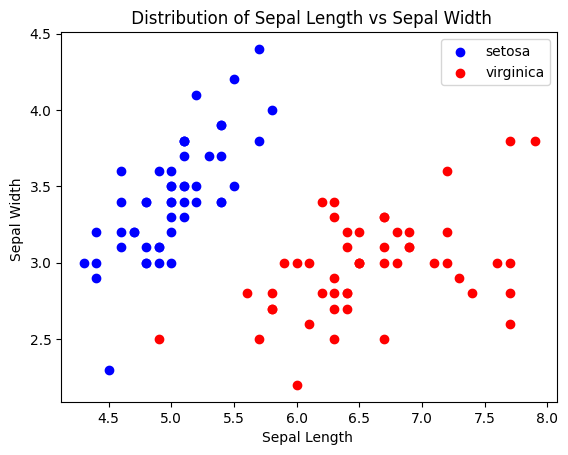

In [5]:
#segregate the data and plot distribution

setosa = df[df['flower'] == 0]
virginica =df[df['flower'] == 1]


#plot the new data

plt.scatter(setosa['sepal length'], setosa['sepal width'], color='blue', label='setosa')
plt.scatter(virginica['sepal length'], virginica['sepal width'], color='red', label='virginica')
plt.xlabel('Sepal Length ')
plt.ylabel('Sepal Width ')
plt.title(' Distribution of Sepal Length vs Sepal Width')
plt.legend()
plt.show()

features looks like it can be well classified i can see the decision boundary well so the features i selected are correct

In [6]:
#seperate the data to train and test as %80 and %20 respectively


#X1 = df['sepal length']
#X2 = df['sepal width']
X = df[['sepal length', 'sepal width']]
y =  df['flower']

# Split the data randomly in 80:20, that is train and test data both should have roughly 50-50% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)#random state 42 because of googling

# make sure the distribution by printing for train and test as well
print("Training dataset:")
print("Num of setosa samples:", (y_train == 0).sum())
print("Num of virginica samples:", (y_train == 1).sum())
print("Total data in training set:", len(y_train))

print("Test Set:")
print("Num of setosa samples:", (y_test == 0).sum())
print("Num of virginica samples:", (y_test == 1).sum())
print("Total data in test set:", len(y_test))

Training dataset:
Num of setosa samples: 40
Num of virginica samples: 40
Total data in training set: 80
Test Set:
Num of setosa samples: 10
Num of virginica samples: 10
Total data in test set: 20


In [7]:
#sigmoid function to use it for logistic regression
def sigmoid(z):
    
    g = 1/(1+np.exp(-z))
    
    return g


In [8]:
def OldLogisticRegression(X, y, alpha, iterations, w, b):
    
    m, n = X.shape  # Get the number of samples and features
    
    # Initialize weights and bias
    weights = np.array(w)
    bias = b
    
    # Normalize the input features
    X_norm = (X - X.mean()) / X.std()
    
    
    cost_history = [] #store the cost through iterations
    accuracy_history = [] #store teh accuracy through iterations
    
    for it in range(iterations):
        
        z = np.dot(X_norm, weights) + bias #apply the model corresponding weight to input and bias
        y_pred = sigmoid(z) # apply sigmoid function to get the logistic regrssion model
        
        # calculate the mse and append to the cost history lst
        cost = (1 / (2 * m)) * np.sum((y - y_pred) ** 2)
        cost_history.append(cost)
        
        # initiliaze the gradients of weightd (2 features) and the bias 
        w_gradient = np.zeros(n)
        b_gradient = 0
        
        for i in range(m):
            error = y[i] - y_pred[i] #get the individual error
            prediction = y_pred[i]
            
            # calculate the update rule for logistic regression for weights
            for j in range(n):
                w_gradient[j] += error * prediction * (1 - prediction) * X_norm[i, j]
            
            # calculate the update rule for logistic regression for bias
            b_gradient += error * prediction * (1 - prediction)
        
        # apply the update rule here for weights and bias
        for j in range(n):
            weights[j] += alpha * w_gradient[j] / m
        bias += alpha * b_gradient / m
        
        # calculate the accuracy
        pred_class = [1 if i> 0.5 else 0 for i in y_pred] #apply the thershold
        accuracy = np.mean(pred_class == y) * 100 # get it as percentage
        accuracy_history.append(accuracy) #append the prediciton into accuracy list

    return weights, bias, cost_history, accuracy_history








Final weights: [ 4.09152489 -0.62193973]
Final bias: -3.624260648454874
final accuracy: % 100.0
final cost:  0.01345106552673172


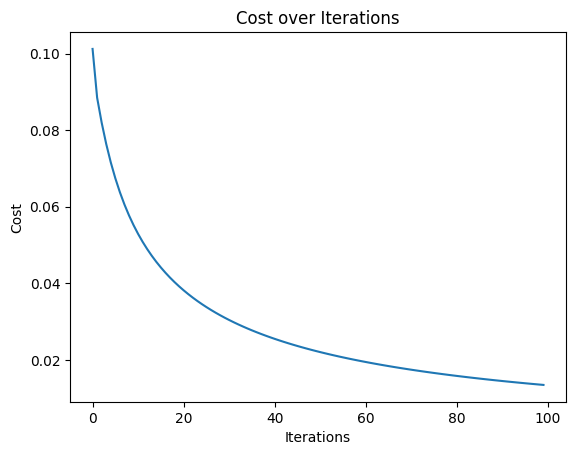

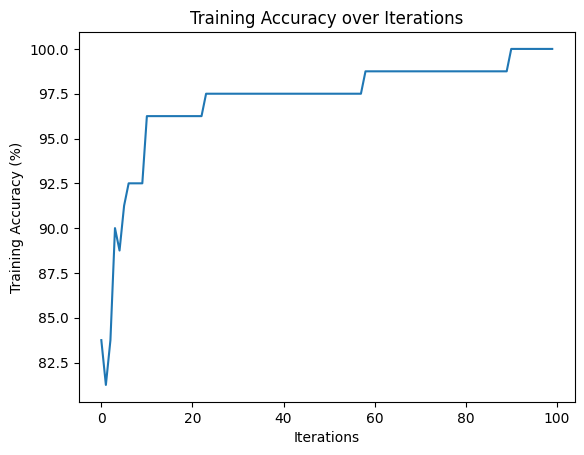

In [24]:
alpha = 5
iterations = 100
w = [0.5, 0.5]  # initial weights
b = 0  # initial bias

# train the model
weights, bias, cost_history, accuracy_history = OldLogisticRegression(X_train.to_numpy(), y_train.to_numpy(), alpha, iterations, w, b)

# print final weights and bias
print("Final weights:", weights)
print("Final bias:", bias)
print("final accuracy: %",accuracy_history[-1])
print("final cost: ", cost_history[-1])

# plot the cost function over iterations
import matplotlib.pyplot as plt

plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost over Iterations")
plt.show()

# plot accuracy over iterations
plt.plot(range(iterations), accuracy_history)
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy over Iterations")
plt.show()






u can use MSE


In [10]:
def LogisticRegression(X, y, alpha, iteratioons, w, b):
    
    m,n = X.shape #get the shape of the
    
    #initialize the first weights and the bias here
    weights = np.array(w)
    bias = b
    
    X_norm = (X - X.mean()) /  X.std() #normalize the input features
    
    cost_history = [] # storet the cost to iterations
    accuracy_list = [] #for accuracy to store it
    
    for i in range(iteratioons):
        
        z = np.dot(X_norm, weights) + bias #model setup
        y_pred = sigmoid(z) ##putting the model into the sigmoid function to get logistic regression model
        
        #calculate cost and append to cost_history list
        
        cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) #calculate it with log for now not sure
        cost_history.append(cost)
        
        
        #calculate gradients for weight and bias
        
        w_gradient = (1/m) * np.dot(X_norm.T, (y_pred - y)) #calculate the gradient of w with dot product so 
        #corresponds to the error*X and turn to transpose for dimension errors
        b_gradient = (1/m) * np.sum(y_pred - y) #calculate the bias gradient
        
        #update the weights at the same time        
        
        weights -= alpha * w_gradient
        bias -= alpha * b_gradient
        
        #calculate accuracy on train data
        
        pred_class = [1 if i> 0.5 else 0 for i in y_pred]
        
        accuracy = np.mean(pred_class ==y) * 100 #multpily by 100 for percentage
        accuracy_list.append(accuracy) #add to the list for accuracy
        
    return weights, bias, cost_history , accuracy_list
        
    
        
    
    
    
    

    


final weights:  [ 1.55277129 -0.39629485]
final bias:  0.027833603659561636
final accuracy: % 100.0
final cost:  0.22535472041269086


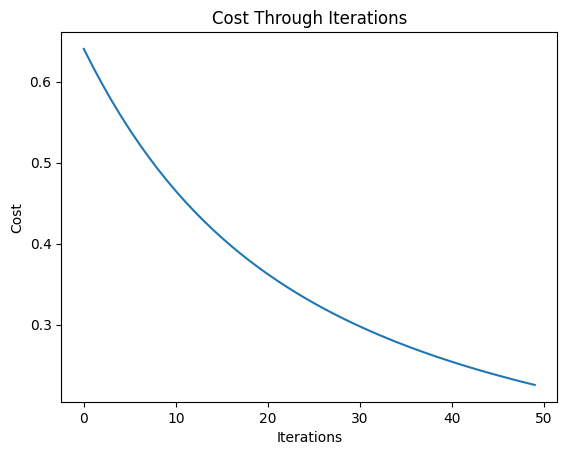

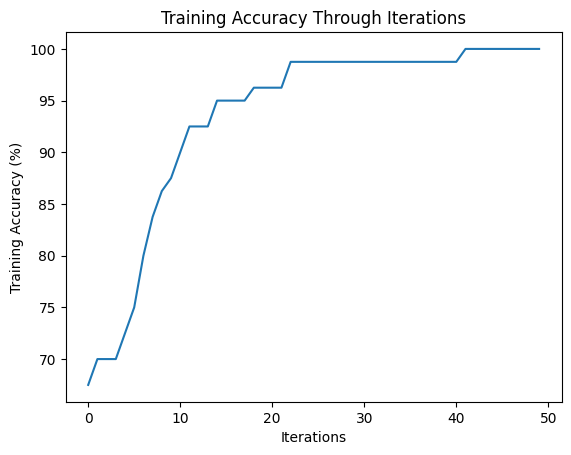

In [17]:
#DRIVER CODE FOR LOGISTIC REGRESSION

#alpha, iterations, initial weight and bias setup
alpha = 0.1
iterations = 50
w = [0.5, 0.5]
b = 0

#train the model
weights, bias, cost_history, accuracy_history = LogisticRegression(X_train, y_train, alpha, iterations, w, b)

#final weight and biases cost and accuracy print to see
print("final weights: ", weights)
print("final bias: ", bias)
print("final accuracy: %",accuracy_history[-1])
print("final cost: ", cost_history[-1])

#plot the cost function through iterations

plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Through Iterations")
plt.show()

#plot the accuracy through iterations

plt.plot(range(iterations), accuracy_history)
plt.xlabel("Iterations")
plt.ylabel("Training Accuracy (%)")
plt.title("Training Accuracy Through Iterations")
plt.show()




Change the features and try to get to the 100 accuracy

In [16]:

X_norm_test = (X_test - X_train.mean()) / X_train.std() #normalize the test data

z_test = np.dot(X_norm_test,  weights) + bias # model for the test data

y_test_pred = sigmoid(z_test) # get it into sigmoid function for logistic regression for test data

y_pred_class_test = [1 if pred > 0.5 else 0 for pred in y_test_pred] # apply the threshold

test_accuracy = np.mean(y_pred_class_test == y_test) * 100 #get the probabilty of the accuracy as %

print("test accuracy is: %", test_accuracy)




test accuracy is: % 95.0


In [ ]:
'''X_test_norm = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
z_test = bias + np.dot(X_test_norm, weights)
y_test_pred = sigmoid(z_test)

# Convert probabilities to binary predictions
y_test_pred_class = [1 if pred > 0.5 else 0 for pred in y_test_pred]
test_accuracy = np.mean(y_test_pred_class == y_test) * 100

print("Test Accuracy:", test_accuracy, "%")'''